# 1. Introduction

## Derive an analytical solution to the regression problem. Use a vector form of the equation.

- Само уравнение линейной регрессии: (большие буквы  - векторы, @ - матричное умножение)

Y = X @ W + E
 - Функция потерь (лосс):

 L(W) = ||Y - X @ W|| ** 2 = (Y-X @ W).T @ (Y - X @ W)

 L(W) = Y.T @ Y - 2*W.T @ X.T @ Y + W.T @ X.T @ X @ W

 - Дифференцируем по вектору весов W и приравниваем к 0 (находим локальный минимум, который, вообще-то, из-за того, что функция потерь выпуклая, ещё и глобальный минимум)

 L'(W) = -2 * X.T @ Y + 2*X.T@X@W = 0

  2 * X.T @ Y  =  2 * X.T @ X @ W

  (X.T @ Y) = X.T @ X @ W


  - откуда (если допустить, что матрица (X.T @ X) - невырожденная, т.е. существует матрица, которая при умножении на неё даст единичную I) - и это ещё и условие отсутствия мультиколлинеарности

  W = (X.T @ X) ** (-1) @ (X.T @ Y)


## What changes in the solution when L1 and L2 regularizations are added to the loss function.

- Говоря обычным языком, в функцию потерь добавится L1 и L2-нормы матрицы весов, что немного поменяет градиенты и вычисления.

в общем виде:

L(W) = ||Y - X @ W|| ** 2 + lambda * R(W)


- L1 (lasso)

L(W) = ||Y - X @ W|| ** 2 + lambda * ||W||1

L(W) = ||Y - X @ W|| ** 2 + lambda * sum(w_j)

здесь второе слагаемое функции потерь содержит функцию модуля, которая недифференцируема в точке (0,0) - итого функция потерь недифференцируема в точках, где любой из коэффициентов w_j == 0.

в точках неравных нулю:
L'(W) = ||Y - X @ W|| ** 2 + lambda * sign(W)

если w_j > 0:

L'(W) = ||Y - X @ W|| ** 2 + lambda * W


если w_j < 0:

L'(W) = ||Y - X @ W|| ** 2 - lambda * W


градиент (случай w_j > 0, W* - вектор таких w_j):

L'(W) = -2*X.T @ Y + 2*X.T @ X @ (W*) + lambda* (W*)
  X.T @ X @ (W*) + lambda*(W*) = X.T @ Y

замкнутый круг: чтобы узнать знак w_j, нужно найти его значение и наоборот. поэтому в лассо-регуляризации используются итеративные численные алгоритмы (тот же градиентный спуск), по очереди фиксируются значения всех коэффициентов, кроме одного, и все повторяется пока w_j не сойдутся.

МОЖЕТ ЗАНУЛЯТЬ НЕК ПРИЗНАКИ > ОТБОР

- L2 (ridge)

L(W) = ||Y - X @ W|| ** 2 + lambda * ||W||2 **2

L(W) = ||Y - X @ W|| ** 2 + lambda * sum((w_j) ** 2)


тогда градиент будет:

L'(W) = -2*X.T @ Y + 2*X.T @ X @ W + 2*lambda*W = 0

X.T @ X @ W + lambda*W = X.T @ Y

W (X.T @ X + lambda* I @ W) = X.T @ Y


откуда


W = (X.T @ X + lambda*I) ** (-1) @ X.T @ Y



матрица  (X.T @ X + lambda*I) гарантированно невырожденная

СЖИМАЕТ КОЭФФ К 0, НО НЕ ОБНУЛЯЕТ (ЧТОБЫ ГАРАНТИРОВАТЬ НЕВЫРОЖДЕННОСТЬ МАТРИЦЫ)

## Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?

- для L1-регуляризации область, ограничивающая коэффициенты, имеет форму ромба (Л1- норма это модуль от числа или |w_1| + |w_2| = <= t - уравнение квадрата или ромба) или октаэдра и тд. Сам контур функции квадратичной ошибки - эллипс. За счет наличия углов у ромба функции кв ошибки гораздо вероятнее коснуться их, соответственно, пересечься с осью, где какой-либо из коэффициентов занулиться. Поэтому некоторые коэффициенты зануляются, происходит отбор фич. Такие модели называют еще разреженными.
+ из-за того, что происходит под капотом: в процессе нахождения коэффициентов нек алгоритмы находят сначала аналитическое решения для каждого коэффициента w_j без регуляризации. если найденное значение меньше порогового (Soft Thresholding Operator), коэфф отбрасывается.


- для L2-регуляризации область, ограничивающая коэффициенты, - круг или сфера (Л2 - норма это квадрат числа или (w_1)**2 + (w_2) ** 2 <= t **2 - уравнение эллипса). Соответственно никаких углов, и гораздо вероятнее что функция кв ошибки коснется круга НЕ в точках пересечения с осями - коэффициенты не зануляются (хоть и могут быть супер-маленькими)

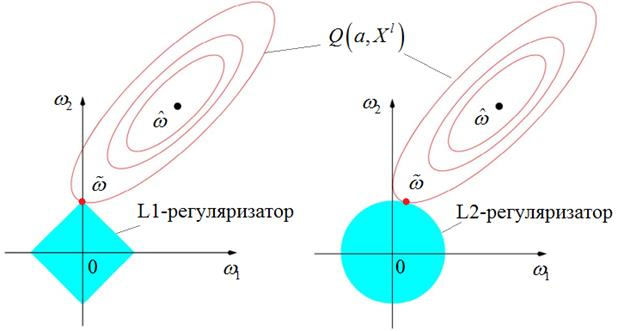

## Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies.

1) Мы можем преобразовать исходные признаки (от которых нет линейной зависимости для таргета), используя нелинейные функции, и создать новые признаки, относительно которых зависимость таргета будет уже линейной.
2) Теорема Вейерштрасса: Любую непрерывную функцию на замкнутом интервале можно приблизить полиномами. Соответственно любую нелинейную зависимость можно представить как комбинацию линейных.
Чтобы настроить сложность модели в новом пространстве признаков, как раз есть регуляризации.

# 2. Preprocessing

- Import libraries.
- Read Train and Test Parts.
- Preprocess "Interest Level" feature.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lightgbm as lgb
import scipy as sp
import statsmodels as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm
import re

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
train_df = pd.read_json ("/content/drive/MyDrive/Colab Notebooks/train.json")

In [127]:
#test_df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/test.json")

In [128]:
def cleaner(data, column_name:str) -> pd.DataFrame:  # функция для очистки от аутлайеров
  q1 = data[column_name].quantile(q=0.01)
  q2 = data[column_name].quantile(q=0.99)
  cleaned_data = data[(data[column_name] > q1) & (data[column_name] < q2)].reset_index(drop=True)
  return cleaned_data

In [6]:
cleaned_train = cleaner(train_df, "price")
#cleaned_test = cleaner(test_df, "price")

In [7]:
cleaned_train.iloc[cleaned_train['interest_level'] == 'low', cleaned_train.columns == 'interest_level'] = 0
cleaned_train.iloc[cleaned_train['interest_level'] == 'medium', cleaned_train.columns == 'interest_level'] = 1
cleaned_train.iloc[cleaned_train['interest_level'] == 'high', cleaned_train.columns == 'interest_level'] = 2
cleaned_train.loc[:,'interest_level'] = cleaned_train['interest_level'].astype(int)

In [8]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48343 entries, 0 to 48342
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        48343 non-null  float64
 1   bedrooms         48343 non-null  int64  
 2   building_id      48343 non-null  object 
 3   created          48343 non-null  object 
 4   description      48343 non-null  object 
 5   display_address  48343 non-null  object 
 6   features         48343 non-null  object 
 7   latitude         48343 non-null  float64
 8   listing_id       48343 non-null  int64  
 9   longitude        48343 non-null  float64
 10  manager_id       48343 non-null  object 
 11  photos           48343 non-null  object 
 12  price            48343 non-null  int64  
 13  street_address   48343 non-null  object 
 14  interest_level   48343 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 5.5+ MB


# 3. Intro data analysis part 2

- Let's generate additional features for better model quality. Consider a column called "Features". It consists of a list of highlights of the current flat.
- Remove unused symbols ([,], ', ", and space) from the column.
- Get all values in each list and collect the result in one huge list for the whole dataset. You can use DataFrame.iterrows().
- How many unique values does a result list contain? - 1529 + 1 пустая

In [9]:
cleaned_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,1
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,0
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,1
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,1
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,0


In [131]:
def get_info_features(data):
  def chunk_generator():
    data_chunks = [data.iloc[i:i+20] for i in range(0, len(data), 20)]
    pattern = re.compile(r'[ \]\[\'\"]+')
    #b = "[,]'\" "

    for chunk_num, chunk in enumerate(tqdm(data_chunks, desc="Обработка чанков")):
      chunk_data = []

      for index, row in chunk.iterrows():  #row - list of strings from all columns
        if not row['features']:
          chunk_data.append('')
          #print('hey')
          continue
        for string in row['features']:
          if not string.strip():
            chunk_data.append('')

          features = string.split(",")
          #print(features)
          for feature in features:
            cleaned_feature = pattern.sub('', feature, 0)
            if cleaned_feature  == '':
              chunk_data.append(cleaned_feature)
            else:
              chunk_data.append(cleaned_feature)
      yield chunk_data

  all_features = []
  for chunk_features in chunk_generator():
    all_features.extend(chunk_features)

  unique_features = set(all_features)
  row_count = len(all_features)
  unique_count = len(unique_features)

  print(f"\nВсего найдено фич: {row_count}")
  print(f"Из них уникальных фич: {unique_count}")

  return all_features, unique_features

In [132]:
all_feat, unique_feat = get_info_features(cleaned_train)

Обработка чанков: 100%|██████████| 2418/2418 [00:04<00:00, 580.71it/s]


Всего найдено фич: 265483
Из них уникальных фич: 1530


- Let's get acquainted with the new library — Collections. With this package you could effectively get quantity statistics about your data.
Count the most popular functions from our huge list and take the top 20 for this moment.
- If everything is correct, you should get next values:  'Elevator', 'CatsAllowed', 'HardwoodFloors', 'DogsAllowed', 'Doorman', 'Dishwasher', 'NoFee', 'LaundryinBuilding', 'FitnessCenter', 'Pre-War', 'LaundryinUnit', 'RoofDeck', 'OutdoorSpace', 'DiningRoom', 'HighSpeedInternet', 'Balcony', 'SwimmingPool', 'LaundryInBuilding', 'NewConstruction', 'Terrace'.

In [12]:
from collections import Counter

In [13]:
cnt = Counter()
for feature in all_feat:
  cnt[feature] +=1
top_20 = cnt.most_common(21)

In [14]:
top_20 #list of TUPLES

[('Elevator', 25375),
 ('HardwoodFloors', 23146),
 ('CatsAllowed', 23135),
 ('DogsAllowed', 21652),
 ('Doorman', 20479),
 ('Dishwasher', 20081),
 ('NoFee', 17793),
 ('LaundryinBuilding', 16082),
 ('FitnessCenter', 12989),
 ('Pre-War', 8971),
 ('LaundryinUnit', 8437),
 ('RoofDeck', 6417),
 ('OutdoorSpace', 5132),
 ('DiningRoom', 4890),
 ('HighSpeedInternet', 4223),
 ('', 3106),
 ('Balcony', 2898),
 ('SwimmingPool', 2643),
 ('LaundryInBuilding', 2564),
 ('NewConstruction', 2504),
 ('Terrace', 2177)]

- Now create 20 new features based on the top 20 values: 1 if the value is in the "Feature" column, otherwise 0.
- Extend our feature set with 'bathrooms', 'bedrooms' and create a special variable feature_list with all feature names. Now we have 22 values. All models should be trained on these 22 features.

In [15]:
train_df = cleaned_train[['bathrooms', 'bedrooms', 'features', 'interest_level', 'price']]
train_df

,bathrooms,bedrooms,features,interest_level,price
0,1.0,1,"[Dining Room, Pre-War, Laundry in Building, Di...",1,2400
1,1.0,2,"[Doorman, Elevator, Laundry in Building, Dishw...",0,3800
2,1.0,2,"[Doorman, Elevator, Laundry in Building, Laund...",1,3495
3,1.5,3,[],1,3000
4,1.0,0,"[Doorman, Elevator, Fitness Center, Laundry in...",0,2795
...,...,...,...,...,...
48338,1.0,3,"[Elevator, Dishwasher, Hardwood Floors]",0,2800
48339,1.0,2,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",1,2395
48340,1.0,1,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",1,1850
48341,1.0,2,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",1,4195


In [130]:
def features_encoder(df, top_20):
    pd.options.mode.copy_on_write = True
    pattern = re.compile(r'[\]\[\'\" ]+')

    for index, row in df.iterrows():
        features = []
        #print(features)
        if not row['features']:
            features.append('')
        else:
            for string in row['features']:
                if not string.strip():
                    features.append('')
                    continue

                feature_string = pattern.sub('', string, 0)
                feature_string = feature_string.split(",")

                for feat in feature_string:
                    if not feat.strip():
                        features.append('')
                    else:
                        features.append(feat)

        for new_feat, num in top_20:
          #print(new_feat)
          if new_feat in features:
              df.loc[index, new_feat] = 1
              #value_list.append(1)
          else:
              df.loc[index, new_feat] = 0
              #value_list.append(0)
              #print("here")

    return df

In [17]:
train_df = features_encoder(train_df, top_20)

In [18]:
train_df.head()

,bathrooms,bedrooms,features,interest_level,price,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,...,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1.0,1,"[Dining Room, Pre-War, Laundry in Building, Di...",1,2400,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2,"[Doorman, Elevator, Laundry in Building, Dishw...",0,3800,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2,"[Doorman, Elevator, Laundry in Building, Laund...",1,3495,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,3,[],1,3000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,"[Doorman, Elevator, Fitness Center, Laundry in...",0,2795,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
if 'features' in train_df.columns:
    train_df= train_df.drop("features", axis=1)

train_df['bathrooms'] = train_df['bathrooms'].astype('int')
train_df['bedrooms'] = train_df['bedrooms'].astype('int')
train_df['interest_level'] = train_df['interest_level'].astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('price', axis=1), train_df['price'], test_size=0.2, random_state=21)

In [20]:
#Y_train = train_df["price"]
#X_train = train_df.drop(["features", "interest_level", "price"], axis =1)

In [21]:
#common_columns = [col for col in test_df.columns if col in train_df.columns]
#test_df = test_df[common_columns]
#test_df = features_encoder(test_df, top_20)

In [22]:
#Y_test = test_df['price']
#X_test = test_df.drop(['features', 'price'], axis=1)

# 4. Models implementation — Linear regression

- Initialize the random number generator with a seed of 21.
- Implement a Python class for a linear regression algorithm with two basic methods — fit and predict. Use stochastic gradient descent (SGD) to find optimal model weights. For better understanding, we recommend implementing separate versions of the algorithm with the analytical solution and non-stochastic gradient descent under the hood.
- What is determenistic model? Make SGD determenistic. - воспроизводимые результаты при одинаковых начальных и конечных условиях
- Define the R squared (R2) coefficient and implement a function to calculate it. - коэфф детерминации

In [23]:
class MyLinearRegression:

  def __init__(self, mode=None, penalty=None, alpha=0.1, lr=0.005, iters=5000, l1_ratio=0.5):
    #y = wx+b
    self.weights = None
    self.b = 0
    np.random.seed(21)
    self.mode = mode
    self.penalty = penalty
    self.alpha = alpha
    self.lr = lr
    self.iters = iters
    self.l1_ratio = l1_ratio


  def fit(self, X, Y, intercept=True):
    self.X = np.array(X)
    self.Y = np.array(Y)
    self.obs, self.feat = self.X.shape

    if intercept:
      self.X = np.c_[np.ones(self.obs), np.array(X)] #добавляем единичный вектор
      self.weights = np.zeros(self.feat + 1) # матрица заполненнми нулями
      self.weights[0] = np.mean(self.Y) # b - нач инициализация
    else:
      self.weights = np.zeros(self.feat)

    #нач инициализация весов при условии отсутствия мультиколлинеарности
    for j in range(self.feat):
      x_j = self.X[:,j]
      if np.dot(x_j, x_j) > 1e-10:
        if intercept:
          self.weights[j+1] = np.dot(self.Y, x_j) / np.dot(x_j, x_j)
        else:
          self.weights[j] = np.dot(self.Y, x_j) / np.dot(x_j, x_j)
    #го итерации

    #initial_lr = self.lr
    for i in range(self.iters):
      #current_lr = initial_lr / (1 + 0.001 * i)
      if self.mode=="non-stochastic":
          self.gradient_descent(self.X, self.Y)

      elif self.mode=="stochastic":
          self.stochastic_gradient_descent(self.X, self.Y)

      else:  #self.mode=="analytical":
          self.weights = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y
          self.penalty = None
          break
      #else:

        #self.weights = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y

  def gradient_descent(self, X, Y):
    self.weights = np.clip(self.weights, -1e10, 1e10)
    grad = None
    preds_array = X @ self.weights
    error_array = preds_array - Y
    grad_mse = (2/len(Y)) * (X.T @ error_array)
    has_intercept = X.shape[1] > self.feat

    if self.penalty == "lasso":
      grad_reg = self.alpha * np.sign(self.weights)
      #grad_mse_l1 = (1/len(Y)) * X.T @ error_array
      if has_intercept:
        grad_reg[0] = 0
      grad = grad_reg + grad_mse

    elif self.penalty == 'ridge':
      grad_reg = 2 * self.alpha * self.weights
      if has_intercept:
        grad_reg[0] = 0
      grad = grad_reg + grad_mse

    elif self.penalty == "elasticnet":
      l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights)
      l2_grad = self.alpha * (1 - self.l1_ratio) * self.weights
      grad_reg = l1_grad + l2_grad
      if has_intercept:
        grad_reg[0] = 0

      #grad_mse_elastic = (1 / len(Y)) * X.T @ error_array
      grad = grad_mse + grad_reg

    elif self.penalty == None:
      grad = grad_mse

    else:
      raise Exception("Допустимые значения для параметра penalty: None, lasso, ridge, elasticnet")

    self.weights -= self.lr * grad

  def stochastic_gradient_descent(self, X, Y):
    self.weights = np.clip(self.weights, -1e10, 1e10)

    batch_size = 32 #реализация мини-батча, без нее требует большего кол-ва итераций до сходимостт
    row_indices = np.random.choice(len(Y), batch_size, replace=False)
    #row_index = np.random.randint(len(Y)) #генерируем 1 рандомное наблюдение на каждой итерации - рандомный х для каждого признака
    #x_i = X[row_index]
    #y_i = Y[row_index]
    X_batch = X[row_indices]
    Y_batch = Y[row_indices]

    #preds_array = x_i @ self.weights
    #error_array = preds_array - y_i


    preds_array = X_batch @ self.weights
    error_array = preds_array - Y_batch

    #grad_mse = 2* x_i * error_array
    grad_mse = (2 / batch_size) * (X_batch.T @ error_array)
    has_intercept = X.shape[1] > self.feat

    if self.penalty == "lasso":
      grad_reg = self.alpha * np.sign(self.weights) / len(Y)
      #grad_mse_l1 = x_i * error_array
      grad_mse_l1 = (2 / batch_size) * X_batch.T @ error_array
      if has_intercept:
        grad_reg[0] = 0
      grad = grad_mse_l1 + grad_mse

    elif self.penalty == 'ridge':
      grad_reg = 2 * self.alpha * self.weights / len(Y)
      if has_intercept:
        grad_reg[0] = 0
      grad = grad_reg + grad_mse

    elif self.penalty == "elasticnet":
      l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights) #/ len(Y)
      l2_grad = 2 * self.alpha * (1 - self.l1_ratio) * self.weights #/ len(Y)
      grad_reg = l1_grad + l2_grad
      if has_intercept:
        grad_reg[0] = 0
      #grad_mse_elastic = x_i * error_array
      grad_mse_elastic =  (2 / batch_size) * X_batch.T @ error_array
      grad = grad_mse_elastic + grad_reg

    elif self.penalty == None:
      grad = grad_mse

    else:
      raise Exception("Допустимые значения для параметра penalty: None, lasso, ridge, elasticnet")

    self.weights -= self.lr * grad



  def loss_function(self, X, Y):
    if self.weights is None:
      raise Exception("Модель ещё обучается")
    preds_array = X @ self.weights

    if self.penalty=='elasticnet':
      loss = 0.5 * np.mean((preds_array - Y)** 2) + self.alpha * self.l1_ratio * np.sum(np.abs(self.weights)) + 0.5 * self.alpha *(1-self.l1_ratio) * np.sum(self.weights ** 2)
    elif self.penalty == 'lasso':
      loss = 0.5 * np.mean((preds_array - Y) ** 2) + self.alpha * np.sum(np.abs(self.weights))
    #elif self.penalty == 'ridge':
    elif self.penalty == None:
      loss = np.mean((preds_array - Y) ** 2) + self.alpha * np.sum(self.weights ** 2)
    else:
      print("Допустимые значения для параметра penalty: None, lasso, ridge, elasticnet")
    return loss

  def predict(self, X, intercept=True):
    if self.weights is None:
      raise Exception("Модель ещё обучается")

    X = np.array(X)
    if intercept is True:
      X = np.c_[np.ones(len(X)), X]
    return X @ self.weights

In [24]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [25]:
#X_trial_train, X_trial_test, y_trial_train, y_trial_test

In [26]:
#X_train.info()

In [27]:
train_df['bathrooms'] = train_df['bathrooms'].astype('int')
train_df['bedrooms'] = train_df['bedrooms'].astype('int')
train_df['interest_level'] = train_df['interest_level'].astype('int')

In [28]:
X_train.shape, Y_train.shape

((38674, 24), (38674,))

In [29]:
X_test.shape, Y_test.shape

((9669, 24), (9669,))

- Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.

In [30]:
def evaluate_models(X_train, Y_train, X_test, Y_test, models=None, modes=None):

    dtypes = {'model': 'object', 'train': 'float64', 'test': 'float64'}
    result_MAE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)
    result_MSE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)
    result_r2 = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)

    trained_models = {}

    if models is None:
        if modes is None:
            modes = ['analytical', 'stochastic', 'non-stochastic']

        models = {}
        for mode in modes:
            models[f'my_linreg_{mode}'] = MyLinearRegression(mode=mode)


    for model_name, model in models.items():
        if hasattr(model, 'fit') and hasattr(model, 'predict'):
            if isinstance(model, MyLinearRegression) and 'mode' in model.__dict__:
                model.fit(X_train, Y_train)
            else:
                model.fit(X_train, Y_train)

            trained_models[model_name] = model

            predicted_train = model.predict(X_train)
            predicted_test = model.predict(X_test)

            train_mae = mean_absolute_error(Y_train, predicted_train)
            test_mae = mean_absolute_error(Y_test, predicted_test)

            train_rmse = root_mean_squared_error(Y_train, predicted_train)
            test_rmse = root_mean_squared_error(Y_test, predicted_test)

            train_r2 = r_squared(Y_train, predicted_train)
            test_r2 = r_squared(Y_test, predicted_test)


            new_mae = pd.DataFrame({
                'model': [model_name],
                'train': [train_mae],
                'test': [test_mae]
            })

            new_rmse = pd.DataFrame({
                'model': [model_name],
                'train': [train_rmse],
                'test': [test_rmse]
            })

            new_r2 = pd.DataFrame({
                'model': [model_name],
                'train': [train_r2],
                'test': [test_r2]
            })

            result_MAE = pd.concat([result_MAE, new_mae], ignore_index=True)
            result_MSE = pd.concat([result_MSE, new_rmse], ignore_index=True)
            result_r2 = pd.concat([result_r2, new_r2], ignore_index=True)
        else:
            print(f"Модель {model_name} не имеет методов fit и predict, пропускаем")

    return result_MAE, result_MSE, result_r2, trained_models

In [31]:
mlinreg = MyLinearRegression(mode='analytical')
mlinreg.fit(X_train, Y_train)
predictions_mlinreg = mlinreg.predict(X_test)

- Initialize LinearRegression() from sklearn.linear_model, fit the model, and predict the training and test parts as in the previous lesson.
- Compare the quality metrics and make sure the difference is small (between your implementations and sklearn).
- Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, Y_train)
predictions_linreg = linreg.predict(X_test)

In [33]:
are_identical = np.allclose(predictions_mlinreg, predictions_linreg, rtol=1e-5, atol=1e-5)
# absolute(a - b) <= (atol + rtol * absolute(b))
print(f"Результаты идентичны: {are_identical}")

if not are_identical:
    #находим отличающиеся индексы
    diff_indices = np.where(differences > 1e-5)[0]
    print(f"Количество значимых различий: {len(diff_indices)}")
    print(f"Индексы с различиями: {diff_indices[:10]}")

Результаты идентичны: True


In [34]:
models_dict = {
    'my_linreg': MyLinearRegression(mode='analytical'),
    'my_linreg_GD': MyLinearRegression(mode='non-stochastic'),
    'my_linreg_SGD': MyLinearRegression(mode='stochastic'),
    'sk-linreg': LinearRegression(fit_intercept=True)
    }

result_base_MAE, result_base_MSE, result_base_r2, trained_models_base = evaluate_models(
    X_train, Y_train, X_test, Y_test,
    models=models_dict
)

In [104]:
result_base_MAE

,model,train,test
0,my_linreg,690.745384,691.120512
1,my_linreg_GD,712.288750,719.228046
2,my_linreg_SGD,711.679232,718.541804
3,sk-linreg,690.745384,691.120512


In [105]:
result_base_MSE

,model,train,test
0,my_linreg,1004.068555,998.289193
1,my_linreg_GD,1024.863663,1025.964061
2,my_linreg_SGD,1024.972533,1026.210309
3,sk-linreg,1004.068555,998.289193


In [106]:
result_base_r2

,model,train,test
0,my_linreg,0.596392,0.613630
1,my_linreg_GD,0.579501,0.591911
2,my_linreg_SGD,0.579412,0.591715
3,sk-linreg,0.596392,0.613630


In [107]:
dtypes = {'model': 'object', 'train': 'float64', 'test': 'float64'}
final_MAE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)
final_MSE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)
final_r2 = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)

In [108]:
final_MAE = pd.concat([final_MAE, result_base_MAE[result_base_MAE['model'] == 'sk-linreg']])
final_MSE = pd.concat([final_MSE, result_base_MSE[result_base_MSE['model'] == 'sk-linreg']])
final_r2 = pd.concat([final_r2, result_base_r2[result_base_r2['model'] == 'sk-linreg']])

# 5. Regularized models implementation — Ridge, Lasso, ElasticNet

- Implement Ridge, Lasso, ElasticNet algorithms: extend the loss function with L2, L1 and both regularizations accordingly. - см. класс MyLinearRegression выше
- Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.
- Initialize Ridge(), Lasso(), and ElasticNet() from sklearn.linear_model, fit the model, and make predictions for the training and test samples as in the previous lesson.
- Compare quality metrics and make sure the difference is small (between your implementations and sklearn).
- Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [41]:
def get_models_dict(alpha=0.1, lr=0.005, iters=5000, l1_ratio=0.5, name=None):
    models_dict = {}
    name_suffix = f"_{name}" if name is not None else ""

    for penalty in [None, 'lasso', 'ridge', 'elasticnet']:
        for mode in [None, 'stochastic', 'non-stochastic']:
            if mode is None:
                penalty_used = None
                penalty_str = "nopenalty"
            else:
                penalty_used = penalty
                penalty_str = "nopenalty" if penalty is None else penalty

            mode_str = "analytical" if mode is None else mode
            model_name = f"my_linreg_{mode_str}_{penalty_str}"
            models_dict[model_name] = MyLinearRegression(mode=mode, penalty=penalty_used, alpha=alpha, lr=lr, iters=iters, l1_ratio=l1_ratio)

    models_dict[f'sk_linreg{name_suffix}'] = LinearRegression(fit_intercept=True)
    models_dict[f'sk_lasso{name_suffix}'] = Lasso(alpha=0.1)
    models_dict[f'sk_ridge{name_suffix}'] = Ridge(alpha=0.1)
    models_dict[f'sk_elasticnet{name_suffix}'] = ElasticNet(alpha=0.1)

    return models_dict

In [42]:
models_dict = get_models_dict(alpha=0.1)
result_penalty_MAE, result_penalty_MSE, result_penalty_r2, trained_models_penalty = evaluate_models(
    X_train, Y_train, X_test, Y_test,
    models=models_dict
)

In [43]:
result_penalty_MAE

,model,train,test
0,my_linreg_analytical_nopenalty,690.745384,691.120512
1,my_linreg_stochastic_nopenalty,711.679232,718.541804
2,my_linreg_non-stochastic_nopenalty,712.288750,719.228046
3,my_linreg_stochastic_lasso,693.430534,695.223417
4,my_linreg_non-stochastic_lasso,712.152704,719.071919
5,my_linreg_stochastic_ridge,710.045117,716.661217
6,my_linreg_non-stochastic_ridge,701.289299,706.018263
7,my_linreg_stochastic_elasticnet,697.808072,701.878692
8,my_linreg_non-stochastic_elasticnet,692.237847,696.037911
9,sk_linreg,690.745384,691.120512


In [44]:
result_penalty_MSE

,model,train,test
0,my_linreg_analytical_nopenalty,1004.068555,998.289193
1,my_linreg_stochastic_nopenalty,1024.972533,1026.210309
2,my_linreg_non-stochastic_nopenalty,1024.863663,1025.964061
3,my_linreg_stochastic_lasso,1005.127927,1000.594676
4,my_linreg_non-stochastic_lasso,1024.760303,1025.838485
5,my_linreg_stochastic_ridge,1024.963161,1025.757398
6,my_linreg_non-stochastic_ridge,1035.223341,1037.715655
7,my_linreg_stochastic_elasticnet,1016.383224,1015.827854
8,my_linreg_non-stochastic_elasticnet,1010.067255,1008.798480
9,sk_linreg,1004.068555,998.289193


In [45]:
result_penalty_r2

,model,train,test
0,my_linreg_analytical_nopenalty,0.596392,0.613630
1,my_linreg_stochastic_nopenalty,0.579412,0.591715
2,my_linreg_non-stochastic_nopenalty,0.579501,0.591911
3,my_linreg_stochastic_lasso,0.595540,0.611843
4,my_linreg_non-stochastic_lasso,0.579586,0.592011
5,my_linreg_stochastic_ridge,0.579420,0.592075
6,my_linreg_non-stochastic_ridge,0.570957,0.582509
7,my_linreg_stochastic_elasticnet,0.586431,0.599935
8,my_linreg_non-stochastic_elasticnet,0.591555,0.605452
9,sk_linreg,0.596392,0.613630


In [109]:
models = ['sk_linreg', 'sk_lasso', 'sk_ridge', 'sk_elasticnet']

final_MAE = pd.concat([final_MAE, result_penalty_MAE[result_penalty_MAE['model'].isin(models)]])
final_MSE = pd.concat([final_MSE, result_penalty_MSE[result_penalty_MSE['model'].isin(models)]])
final_r2 = pd.concat([final_r2, result_penalty_r2[result_penalty_r2['model'].isin(models)]])

# 6. Feature normalization

- First, write several examples of why and where feature normalization is mandatory and vice versa.
- 1) Почему важно нормализовать? - стабильность вычислений, корректная работа алгоритмов регуляризации и алгоритмов, основанных на расстояниях и градиентах
- 2) Когда обязательно регуляризовать? -
Если признаки имеют сильно отличающийся масштаб (например, рост 100-200 и возраст 0-120 или жилая площадь  50-200 м^2 и кол-во комнат 1-5) и на таких данных планируется использовать модели с регуляризацией, градиентным спуском, кластеризации и тд.
- 3) Можно не нормализовать, если признаки уже в сравнимом масштабе или если планируется использовать модели, не учитывающие расстояния и градиенты (навный байес - вероятностная модель, рандом форест и все алгоритмы, основанные на деревьях).
- 4) Еще можно не нормализовать, если признаки бинарные или категориальные - тут уже одинаковый масштаб.

- Let's consider the first of the classical normalization methods — MinMaxScaler. Write a mathematical formula for this method.
Implement your own function or class for MinMaxScaler feature normalization.
- Initialize MinMaxScaler() from sklearn.preprocessing.
- Compare the feature normalization with your own method and with sklearn.

In [47]:
class MyMinMaxScaler:
  def normalize(self, X):
    X = np.array(X, dtype=float)
    X_norm = X.copy()
    for col_index in range(X.shape[1]):
      col_min = X[:, col_index].min()
      col_max = X[:, col_index].max()
      val_range = col_max - col_min
      if val_range == 0:
        X_norm[:, col_index] = 0
      else:
        X_norm[:, col_index] = (X[:, col_index] - col_min) / val_range
    return pd.DataFrame(X_norm)

    # если трушно и матрично
        #X = np.array(X, dtype=float)
        #X_min = np.min(X, axis=0)
        #X_max = np.max(X, axis=0)
        #range_val = X_max - X_min
        #range_val[range_val == 0] = 1
        #return (X - X_min) / range_val

In [48]:
my_minmax = MyMinMaxScaler()
norm_X_train= my_minmax.normalize(X_train[['bathrooms', 'bedrooms']])
norm_X_train.sample(5, random_state=42)

,0,1
38125,0.1,0.125
28946,0.1,0.250
25736,0.1,0.000
11477,0.1,0.375
15983,0.1,0.375


In [49]:
from sklearn.preprocessing import MinMaxScaler
sk_minmax = MinMaxScaler()
sk_minmax.fit(X_train[['bathrooms', 'bedrooms']])
norm_X_MMS_train = pd.DataFrame(sk_minmax.transform(X_train[['bathrooms', 'bedrooms']]))
norm_X_MMS_train.sample(5, random_state=42)

,0,1
38125,0.1,0.125
28946,0.1,0.250
25736,0.1,0.000
11477,0.1,0.375
15983,0.1,0.375


- Repeat the steps for another normalization method StandardScaler.

In [50]:
class MyScaler:
  def z_normalize(self, X):
    X = np.array(X, dtype=float)
    X_mean = np.mean(X, axis=0)
    X_stdev = np.std(X, axis=0) + 1e-10
    # альтернатива X_stdev[X_stdev == 0] = 1.0
    return pd.DataFrame((X - X_mean) / X_stdev)

In [51]:
my_scaler = MyScaler()
norm_X_train = my_scaler.z_normalize(X_train[['bathrooms', 'bedrooms']])
norm_X_train.sample(5, random_state=42)

,0,1
38125,-0.413568,-0.486642
28946,-0.413568,0.424361
25736,-0.413568,-1.397645
11477,-0.413568,1.335364
15983,-0.413568,1.335364


In [52]:
from sklearn.preprocessing import StandardScaler
sk_scaler = StandardScaler()
norm_X_SS_train = pd.DataFrame(sk_scaler.fit_transform(X_train[['bathrooms', 'bedrooms']]))
norm_X_SS_train.sample(5, random_state=42)

,0,1
38125,-0.413568,-0.486642
28946,-0.413568,0.424361
25736,-0.413568,-1.397645
11477,-0.413568,1.335364
15983,-0.413568,1.335364


# 7. Fit custom and sklearn models with normalized data

- Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with MinMaxScaler.
- Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with StandardScaler.
- Add all results to our dataframe with metrics on samples.

In [53]:
sk_minmax = MinMaxScaler()
numerical_features = ['bathrooms', 'bedrooms']

#обучение ток на тренировочных, трансформация на обоих
sk_minmax.fit(X_train[numerical_features ])
norm_train_MMS = sk_minmax.transform(X_train[numerical_features])
norm_test_MMS = sk_minmax.transform(X_test[numerical_features])

X_train_MMS_normalized = X_train.copy()
X_test_MMS_normalized = X_test.copy()
X_train_MMS_normalized[numerical_features] = norm_train_MMS
X_test_MMS_normalized[numerical_features] = norm_test_MMS

In [55]:
models_dict = get_models_dict(alpha=0.1, lr=0.1, iters=8000, name='MinMaxScaler')
result_MMS_norm_MAE, result_MMS_norm_MSE, result_MMS_norm_r2, trained_models_MMS_norm = evaluate_models(
    X_train_MMS_normalized, Y_train, X_test_MMS_normalized, Y_test,
    models=models_dict)

In [56]:
result_MMS_norm_MAE

,model,train,test
0,my_linreg_analytical_nopenalty,690.745384,691.120512
1,my_linreg_stochastic_nopenalty,697.681528,698.739952
2,my_linreg_non-stochastic_nopenalty,693.134300,694.445230
3,my_linreg_stochastic_lasso,703.398972,702.285472
4,my_linreg_non-stochastic_lasso,693.136529,694.475141
5,my_linreg_stochastic_ridge,686.840578,687.283625
6,my_linreg_non-stochastic_ridge,943.804747,957.103053
7,my_linreg_stochastic_elasticnet,876.530067,887.449587
8,my_linreg_non-stochastic_elasticnet,836.743812,847.667695
9,sk_linreg_MinMaxScaler,690.745384,691.120512


In [57]:
result_MMS_norm_MSE

,model,train,test
0,my_linreg_analytical_nopenalty,1004.068555,998.289193
1,my_linreg_stochastic_nopenalty,1010.798082,1007.308336
2,my_linreg_non-stochastic_nopenalty,1006.383505,1002.157997
3,my_linreg_stochastic_lasso,1014.783182,1006.825331
4,my_linreg_non-stochastic_lasso,1006.445501,1002.257118
5,my_linreg_stochastic_ridge,1012.124896,1008.258738
6,my_linreg_non-stochastic_ridge,1347.487657,1366.743569
7,my_linreg_stochastic_elasticnet,1298.108074,1314.163414
8,my_linreg_non-stochastic_elasticnet,1219.372971,1232.915580
9,sk_linreg_MinMaxScaler,1004.068555,998.289193


In [58]:
result_MMS_norm_r2

,model,train,test
0,my_linreg_analytical_nopenalty,0.596392,0.613630
1,my_linreg_stochastic_nopenalty,0.590964,0.606617
2,my_linreg_non-stochastic_nopenalty,0.594529,0.610630
3,my_linreg_stochastic_lasso,0.587732,0.606994
4,my_linreg_non-stochastic_lasso,0.594479,0.610553
5,my_linreg_stochastic_ridge,0.589890,0.605875
6,my_linreg_non-stochastic_ridge,0.273087,0.275790
7,my_linreg_stochastic_elasticnet,0.325388,0.330440
8,my_linreg_non-stochastic_elasticnet,0.404741,0.410672
9,sk_linreg_MinMaxScaler,0.596392,0.613630


In [110]:
models = ['sk_linreg_MinMaxScaler', 'sk_lasso_MinMaxScaler', 'sk_ridge_MinMaxScaler', 'sk_elasticnet_MinMaxScaler']

final_MAE = pd.concat([final_MAE, result_MMS_norm_MAE[result_MMS_norm_MAE['model'].isin(models)]])
final_MSE = pd.concat([final_MSE, result_MMS_norm_MSE[result_MMS_norm_MSE['model'].isin(models)]])
final_r2 = pd.concat([final_r2, result_MMS_norm_r2[result_MMS_norm_r2['model'].isin(models)]])

In [111]:
final_MAE

,model,train,test
3,sk-linreg,690.745384,691.120512
9,sk_linreg,690.745384,691.120512
10,sk_lasso,690.674111,691.072779
11,sk_ridge,690.744963,691.120357
12,sk_elasticnet,692.984281,695.924250
9,sk_linreg_MinMaxScaler,690.745384,691.120512
10,sk_lasso_MinMaxScaler,690.691261,691.127595
11,sk_ridge_MinMaxScaler,690.755893,691.148044
12,sk_elasticnet_MinMaxScaler,892.786787,904.956317


In [61]:
sk_standard = StandardScaler()
numerical_features = ['bathrooms', 'bedrooms']

#обучение ток на тренировочных, трансформация на обоих
sk_standard.fit_transform(X_train[numerical_features ])
norm_train_SS = sk_standard.transform(X_train[numerical_features])
norm_test_SS = sk_standard.transform(X_test[numerical_features])

X_train_SS_normalized = X_train.copy()
X_test_SS_normalized = X_test.copy()
X_train_SS_normalized[numerical_features] = norm_train_SS
X_test_SS_normalized[numerical_features] = norm_test_SS

In [62]:
models_dict = get_models_dict(name='Stand_Scaler')
result_SS_norm_MAE, result_SS_norm_MSE, result_SS_norm_r2, trained_models_SS_norm = evaluate_models(
    X_train_SS_normalized, Y_train, X_test_SS_normalized, Y_test,
    models=models_dict
)

In [63]:
result_SS_norm_MAE

,model,train,test
0,my_linreg_analytical_nopenalty,690.745384,691.120512
1,my_linreg_stochastic_nopenalty,714.273178,721.985071
2,my_linreg_non-stochastic_nopenalty,716.275669,724.443577
3,my_linreg_stochastic_lasso,690.674320,692.242491
4,my_linreg_non-stochastic_lasso,716.125350,724.271443
5,my_linreg_stochastic_ridge,717.719034,725.914261
6,my_linreg_non-stochastic_ridge,691.241714,693.557080
7,my_linreg_stochastic_elasticnet,690.007076,692.053146
8,my_linreg_non-stochastic_elasticnet,691.112209,694.648819
9,sk_linreg_Stand_Scaler,690.745384,691.120512


In [64]:
result_SS_norm_MSE

,model,train,test
0,my_linreg_analytical_nopenalty,1004.068555,998.289193
1,my_linreg_stochastic_nopenalty,1029.860364,1031.701471
2,my_linreg_non-stochastic_nopenalty,1029.712889,1031.762662
3,my_linreg_stochastic_lasso,1005.174604,1000.435583
4,my_linreg_non-stochastic_lasso,1029.595489,1031.621527
5,my_linreg_stochastic_ridge,1029.771629,1032.074824
6,my_linreg_non-stochastic_ridge,1016.201675,1013.806772
7,my_linreg_stochastic_elasticnet,1010.184450,1006.607340
8,my_linreg_non-stochastic_elasticnet,1008.999646,1006.548445
9,sk_linreg_Stand_Scaler,1004.068555,998.289193


In [65]:
result_SS_norm_r2

,model,train,test
0,my_linreg_analytical_nopenalty,0.596392,0.613630
1,my_linreg_stochastic_nopenalty,0.575391,0.587334
2,my_linreg_non-stochastic_nopenalty,0.575512,0.587285
3,my_linreg_stochastic_lasso,0.595503,0.611967
4,my_linreg_non-stochastic_lasso,0.575609,0.587398
5,my_linreg_stochastic_ridge,0.575464,0.587035
6,my_linreg_non-stochastic_ridge,0.586579,0.601525
7,my_linreg_stochastic_elasticnet,0.591461,0.607165
8,my_linreg_non-stochastic_elasticnet,0.592418,0.607210
9,sk_linreg_Stand_Scaler,0.596392,0.613630


In [112]:
models = ['sk_linreg_Stand_Scaler', 'sk_lasso_Stand_Scaler', 'sk_ridge_Stand_Scaler', 'sk_elasticnet_Stand_Scaler']

final_MAE = pd.concat([final_MAE, result_SS_norm_MAE[result_SS_norm_MAE['model'].isin(models)]])
final_MSE = pd.concat([final_MSE, result_SS_norm_MSE[result_SS_norm_MSE['model'].isin(models)]])
final_r2 = pd.concat([final_r2, result_SS_norm_r2[result_SS_norm_r2['model'].isin(models)]])

In [113]:
final_MAE

,model,train,test
3,sk-linreg,690.745384,691.120512
9,sk_linreg,690.745384,691.120512
10,sk_lasso,690.674111,691.072779
11,sk_ridge,690.744963,691.120357
12,sk_elasticnet,692.984281,695.924250
9,sk_linreg_MinMaxScaler,690.745384,691.120512
10,sk_lasso_MinMaxScaler,690.691261,691.127595
11,sk_ridge_MinMaxScaler,690.755893,691.148044
12,sk_elasticnet_MinMaxScaler,892.786787,904.956317
9,sk_linreg_Stand_Scaler,690.745384,691.120512


# 8. Overfit models

- Let's look at an overfitted model in practice. From theory, you know that polynomial regression is easy to overfit. So let's create a toy example and see how regularization works in real life.
- In the previous lesson, we created polynomial features with degree 10. Here we repeat these steps from the previous lesson, remembering that we have only 3 basic features — 'bathrooms', 'bedrooms', 'interest_level'.
- And train and fit all our implemented algorithms — Linear Regression, Ridge, Lasso, and ElasticNet — on a set of polynomial features.
- Store the results of the quality metrics in the result dataframe.
Analyze the results and select the best model according to your opinion.
- Additionally try different alpha parameters of regularization in algorithms, choose the best one and analyze results.

In [68]:
X_basic_features_train = X_train[['bathrooms', 'bedrooms', 'interest_level']]
X_basic_features_test = X_test[['bathrooms', 'bedrooms', 'interest_level']]

In [69]:
scaler = StandardScaler()
numerical_features = ['bathrooms', 'bedrooms']
categorical_features = ['interest_level']

sk_standard = StandardScaler()

#обучение ток на тренировочных, трансформация на обоих
sk_standard.fit_transform(X_basic_features_train[numerical_features ])
norm_train_SS = sk_standard.transform(X_basic_features_train[numerical_features])
norm_test_SS = sk_standard.transform(X_basic_features_test[numerical_features])

X_basic_features_SS_train = X_basic_features_train.copy()
X_basic_features_SS_test= X_basic_features_test.copy()

X_basic_features_SS_train[numerical_features] = norm_train_SS
X_basic_features_SS_test[numerical_features] = norm_test_SS

In [70]:
X_basic_features_SS_train.shape

(38674, 3)

In [71]:
X_basic_features_SS_test.shape

(9669, 3)

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(10)
poly.fit_transform(X_basic_features_SS_train)

poly_X_train = poly.transform(X_basic_features_SS_train)
poly_X_test = poly.transform(X_basic_features_SS_test)

In [73]:
models_dict = get_models_dict(name="Poly")
result_poly_MAE, result_poly_MSE, result_poly_r2, trained_models_poly = evaluate_models(
    poly_X_train, Y_train, poly_X_test, Y_test,
    models=models_dict
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e+10, tolerance: 9.660e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+10, tolerance: 9.660e+06
  model = cd_fast.enet_coordinate_descent(


In [74]:
result_poly_MAE

,model,train,test
0,my_linreg_analytical_nopenalty,1.494857e+06,2.786105e+11
1,my_linreg_stochastic_nopenalty,2.307290e+27,3.048846e+24
2,my_linreg_non-stochastic_nopenalty,5.436492e+37,5.994266e+34
3,my_linreg_stochastic_lasso,1.654335e+22,6.121386e+19
4,my_linreg_non-stochastic_lasso,5.436492e+37,5.994266e+34
5,my_linreg_stochastic_ridge,1.358733e+22,4.037903e+19
6,my_linreg_non-stochastic_ridge,5.436492e+37,5.994266e+34
7,my_linreg_stochastic_elasticnet,5.757056e+27,8.295228e+24
8,my_linreg_non-stochastic_elasticnet,5.436492e+37,5.994266e+34
9,sk_linreg_Poly,7.264304e+02,1.946376e+03


In [75]:
result_poly_MSE

,model,train,test
0,my_linreg_analytical_nopenalty,1.938074e+06,2.732699e+13
1,my_linreg_stochastic_nopenalty,4.532255e+29,5.854717e+25
2,my_linreg_non-stochastic_nopenalty,1.068075e+40,1.149611e+36
3,my_linreg_stochastic_lasso,3.244840e+24,1.279633e+21
4,my_linreg_non-stochastic_lasso,1.068075e+40,1.149611e+36
5,my_linreg_stochastic_ridge,2.666215e+24,8.085717e+20
6,my_linreg_non-stochastic_ridge,1.068075e+40,1.149611e+36
7,my_linreg_stochastic_elasticnet,1.130774e+30,1.595802e+26
8,my_linreg_non-stochastic_elasticnet,1.068075e+40,1.149611e+36
9,sk_linreg_Poly,1.040666e+03,1.193075e+05


In [76]:
result_poly_r2

,model,train,test
0,my_linreg_analytical_nopenalty,-1.503741e+06,-2.895170e+20
1,my_linreg_stochastic_nopenalty,-8.223587e+52,-1.328931e+45
2,my_linreg_non-stochastic_nopenalty,-4.567052e+73,-5.123799e+65
3,my_linreg_stochastic_lasso,-4.215210e+42,-6.348359e+35
4,my_linreg_non-stochastic_lasso,-4.567052e+73,-5.123799e+65
5,my_linreg_stochastic_ridge,-2.845922e+42,-2.534706e+35
6,my_linreg_non-stochastic_ridge,-4.567052e+73,-5.123799e+65
7,my_linreg_stochastic_elasticnet,-5.118989e+53,-9.872990e+45
8,my_linreg_non-stochastic_elasticnet,-4.567052e+73,-5.123799e+65
9,sk_linreg_Poly,5.664342e-01,-5.517560e+03


In [114]:
models = ['sk_linreg_Poly', 'sk_lasso_Poly', 'sk_ridge_Poly', 'sk_elasticnet_Poly']

final_MAE = pd.concat([final_MAE, result_SS_norm_MAE[result_SS_norm_MAE['model'].isin(models)]])
final_MSE = pd.concat([final_MSE, result_SS_norm_MSE[result_SS_norm_MSE['model'].isin(models)]])
final_r2 = pd.concat([final_r2, result_SS_norm_r2[result_SS_norm_r2['model'].isin(models)]])

In [78]:
final_MAE

,model,train,test
3,sk-linreg,690.745384,691.120512
9,sk_linreg,690.745384,691.120512
10,sk_lasso,690.674111,691.072779
11,sk_ridge,690.744963,691.120357
12,sk_elasticnet,692.984281,695.924250
9,sk_linreg_MinMaxScaler,690.745384,691.120512
10,sk_lasso_MinMaxScaler,690.691261,691.127595
11,sk_ridge_MinMaxScaler,690.755893,691.148044
12,sk_elasticnet_MinMaxScaler,892.786787,904.956317
9,sk_linreg_Stand_Scaler,690.745384,691.120512


# 9. Naive models

- Calculate the mean and median metrics from the previous lesson and add the results to the final dataframe.


In [129]:
train_df = pd.read_json ("/content/drive/MyDrive/Colab Notebooks/train.json")
train_df = cleaner(train_df, 'price')
train_df.iloc[train_df['interest_level'] == 'low', train_df.columns == 'interest_level'] = 0
train_df.iloc[train_df['interest_level'] == 'medium', train_df.columns == 'interest_level'] = 1
train_df.iloc[train_df['interest_level'] == 'high', train_df.columns == 'interest_level'] = 2
train_df.loc[:,'interest_level'] = train_df['interest_level'].astype(int)

train_df = features_encoder(train_df, top_20)

train_df['bathrooms'] = train_df['bathrooms'].astype('int')
train_df['bedrooms'] = train_df['bedrooms'].astype('int')
train_df['interest_level'] = train_df['interest_level'].astype('int')

if 'features' in train_df.columns:
    train_df= train_df.drop("features", axis=1)
train_df.shape

(48343, 35)

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('price', axis=1), train_df['price'], test_size=0.2, random_state=21)

In [134]:
train_df = pd.concat([X_train, Y_train], axis=1)

In [135]:
test_df = pd.concat([X_test, Y_test], axis=1)

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [137]:
train_df['price_train_mean'] = np.mean(train_df['price'])
train_df['price_train_median'] = np.median(train_df['price'])

test_df['price_test_mean'] = np.mean(test_df['price'])
test_df['price_test_median'] = np.median(test_df['price'])

In [138]:
## MAE on training between target and mean or median AND on test between target and mean or median
train_mean_mae = mean_absolute_error(train_df['price'], train_df['price_train_mean'])
train_median_mae = mean_absolute_error(train_df['price'], train_df['price_train_median'])
test_mean_mae = mean_absolute_error(test_df['price'], test_df['price_test_mean'])
test_median_mae = mean_absolute_error(test_df['price'], test_df['price_test_median'])

In [139]:
## RMSE on training between target and mean or median AND on test between target and mean or median
train_mean_mse = mean_squared_error(train_df['price'], train_df['price_train_mean'])
train_median_mse= mean_squared_error(train_df['price'], train_df['price_train_median'])
test_mean_mse = mean_squared_error(test_df['price'], test_df['price_test_mean'])
test_median_mse = mean_squared_error(test_df['price'], test_df['price_test_median'])

In [140]:
##r2
test_mean_predictions = np.full(len(test_df), np.mean(train_df['price']))
test_median_predictions = np.full(len(test_df), np.median(train_df['price']))

train_mean_r2 = r2_score(train_df['price'], np.full(len(train_df), np.mean(train_df['price'])))
train_median_r2 = r2_score(train_df['price'], np.full(len(train_df), np.median(train_df['price'])))
test_mean_r2 = r2_score(test_df['price'], test_mean_predictions)
test_median_r2 = r2_score(test_df['price'], test_median_predictions)

In [141]:
final_MAE = pd.concat([
    final_MAE,
    pd.DataFrame({
        'model': ['naive_mean_mae', 'naive_median_mae'],
        'train': [train_mean_mae, train_median_mae],
        'test': [test_mean_mae, test_median_mae]
    }).astype(dtypes)
], ignore_index=True)

In [142]:
final_MSE = pd.concat([
    final_MSE,
    pd.DataFrame({
        'model': ['naive_mean_mse', 'naive_median_mse'],
        'train': [train_mean_mse, train_median_mse],
        'test': [test_mean_mse, test_median_mse]
    }).astype(dtypes)

], ignore_index=True)

In [143]:
final_r2 = pd.concat([
    final_r2,
    pd.DataFrame({
        'model': ['naive_mean_r2', 'naive_median_r2'],
        'train': [train_mean_r2, train_median_r2],
        'test': [test_mean_r2, test_median_r2]
    }).astype(dtypes)

], ignore_index=True)

# 10. Compare results

- Print your final tables
- What is the best model?
- Which is the most stable model?

In [144]:
final_MAE

,model,train,test
0,sk-linreg,690.745384,691.120512
1,sk_linreg,690.745384,691.120512
2,sk_lasso,690.674111,691.072779
3,sk_ridge,690.744963,691.120357
4,sk_elasticnet,692.984281,695.924250
5,sk_linreg_MinMaxScaler,690.745384,691.120512
6,sk_lasso_MinMaxScaler,690.691261,691.127595
7,sk_ridge_MinMaxScaler,690.755893,691.148044
8,sk_elasticnet_MinMaxScaler,892.786787,904.956317
9,sk_linreg_Stand_Scaler,690.745384,691.120512


In [119]:
final_MSE

,model,train,test
0,sk-linreg,1004.068555,9.982892e+02
1,sk_linreg,1004.068555,9.982892e+02
2,sk_lasso,1004.070760,9.983239e+02
3,sk_ridge,1004.068555,9.982895e+02
4,sk_elasticnet,1016.363015,1.015636e+03
5,sk_linreg_MinMaxScaler,1004.068555,9.982892e+02
6,sk_lasso_MinMaxScaler,1004.073212,9.983696e+02
7,sk_ridge_MinMaxScaler,1004.069035,9.983110e+02
8,sk_elasticnet_MinMaxScaler,1286.997568,1.303661e+03
9,sk_linreg_Stand_Scaler,1004.068555,9.982892e+02


In [145]:
final_r2

,model,train,test
0,sk-linreg,0.596392,0.613630
1,sk_linreg,0.596392,0.613630
2,sk_lasso,0.596391,0.613603
3,sk_ridge,0.596392,0.613630
4,sk_elasticnet,0.586448,0.600086
5,sk_linreg_MinMaxScaler,0.596392,0.613630
6,sk_lasso_MinMaxScaler,0.596389,0.613568
7,sk_ridge_MinMaxScaler,0.596392,0.613613
8,sk_elasticnet_MinMaxScaler,0.336886,0.341100
9,sk_linreg_Stand_Scaler,0.596392,0.613630


- лучшая модель - Lasso MinMaxScaler или linreg
- стабильная модель -

# 11. Addition task

- There are some tricks with the target variable for better model quality. If we have a distribution with a heavy tail, you can use a monotone function to "improve" the distribution. In practice, you can use logarithmic functions. We recommend that you do this exercise and compare the results. But don't forget to do the inverse transformation if you want to compare metrics.
- The next trick is outliers. The angle of the linear regression line depends strongly on outliers. And often you should remove these points from !allert! only training data. You should explain why they were removed from the training sample only.  We recommend that you do this exercise and compare the results.
- It will also be a useful exercise to implement a linear regression algorithm with batch and mini-batch training or analytical solution (as mentioned in 4.1).

In [146]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

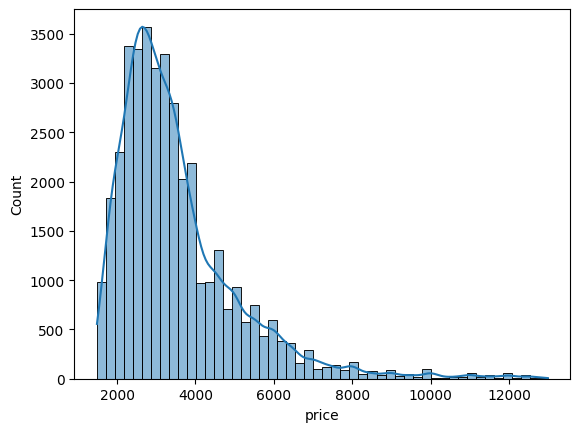

In [147]:
sns.histplot(Y_train, bins=50, kde=True)

In [148]:
from scipy.stats import norm, skew
mu, sigma = norm.fit(Y_train)
mu, sigma

(np.float64(3535.823783420386), np.float64(1580.4606760028137))

In [149]:
Y_train_transformed = np.log1p(Y_train)
mu, sigma = norm.fit(Y_train_transformed)
mu, sigma

(np.float64(8.091714166386051), np.float64(0.38341842797816467))

<Axes: xlabel='price', ylabel='Count'>

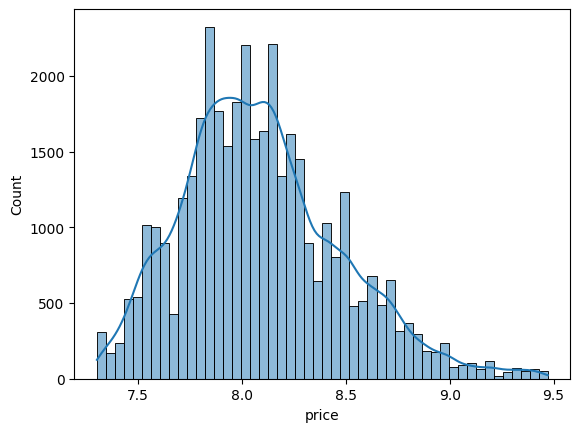

In [150]:
sns.histplot(Y_train_transformed, bins=50, kde=True)

In [158]:
cols_to_del = ['building_id', 'created', 'description', 'display_address', 'latitude', 'listing_id', 'longitude', 'manager_id', 'street_address', 'photos']
for col in cols_to_del:
  if col in X_train.columns:
    X_train = X_train.drop(col, axis=1)

In [160]:
cols_to_del = ['building_id', 'created', 'description', 'display_address', 'latitude', 'listing_id', 'longitude', 'manager_id', 'street_address', 'photos']
for col in cols_to_del:
  if col in X_test.columns:
    X_test = X_test.drop(col, axis=1)

In [164]:
#X_train

In [165]:
#X_test

In [163]:
# метрики на трансформированном Y
models_dict = {
    'my_linreg': MyLinearRegression(mode='analytical'),
    'my_linreg_GD': MyLinearRegression(mode='non-stochastic'),
    'my_linreg_SGD': MyLinearRegression(mode='stochastic'),
    'sk-linreg': LinearRegression(fit_intercept=True)
    }

result_log_MAE, result_log_MSE, result_log_r2, trained_models_log = evaluate_models(
    X_train, Y_train, X_test, Y_test,
    models=models_dict
)

In [170]:
result_base_MAE

,model,train,test
0,my_linreg,690.745384,691.120512
1,my_linreg_GD,712.288750,719.228046
2,my_linreg_SGD,711.679232,718.541804
3,sk-linreg,690.745384,691.120512


In [166]:
result_log_MAE

,model,train,test
0,my_linreg,690.745384,691.120512
1,my_linreg_GD,712.288750,719.228046
2,my_linreg_SGD,711.679232,718.541804
3,sk-linreg,690.745384,691.120512


In [167]:
result_log_MSE

,model,train,test
0,my_linreg,1004.068555,998.289193
1,my_linreg_GD,1024.863663,1025.964061
2,my_linreg_SGD,1024.972533,1026.210309
3,sk-linreg,1004.068555,998.289193


In [168]:
result_log_r2

,model,train,test
0,my_linreg,0.596392,0.613630
1,my_linreg_GD,0.579501,0.591911
2,my_linreg_SGD,0.579412,0.591715
3,sk-linreg,0.596392,0.613630


In [171]:
# если не чистить от выбросов по цене
train_df = pd.read_json ("/content/drive/MyDrive/Colab Notebooks/train.json")

train_df.iloc[train_df['interest_level'] == 'low', train_df.columns == 'interest_level'] = 0
train_df.iloc[train_df['interest_level'] == 'medium', train_df.columns == 'interest_level'] = 1
train_df.iloc[train_df['interest_level'] == 'high', train_df.columns == 'interest_level'] = 2
train_df.loc[:,'interest_level'] = train_df['interest_level'].astype(int)

train_df = features_encoder(train_df, top_20)

train_df['bathrooms'] = train_df['bathrooms'].astype('int')
train_df['bedrooms'] = train_df['bedrooms'].astype('int')
train_df['interest_level'] = train_df['interest_level'].astype('int')

if 'features' in train_df.columns:
    train_df= train_df.drop("features", axis=1)
train_df.shape


(49352, 35)

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('price', axis=1), train_df['price'], test_size=0.2, random_state=21)

In [175]:
cols_to_del = ['building_id', 'created', 'description', 'display_address', 'latitude', 'listing_id', 'longitude', 'manager_id', 'street_address', 'photos']
for col in cols_to_del:
  if col in X_train.columns:
    X_train = X_train.drop(col, axis=1)
for col in cols_to_del:
  if col in X_test.columns:
    X_test = X_test.drop(col, axis=1)

In [176]:
result_out_MAE, result_out_MSE, result_out_r2, trained_models_out = evaluate_models(
    X_train, Y_train, X_test, Y_test,
    models=models_dict
)

In [177]:
result_out_MAE

,model,train,test
0,my_linreg,1235.875342,1034.222255
1,my_linreg_GD,1247.333138,1043.317855
2,my_linreg_SGD,1363.144930,1158.192328
3,sk-linreg,1235.875342,1034.222255


In [178]:
result_out_MSE

,model,train,test
0,my_linreg,24565.996759,2183.715256
1,my_linreg_GD,24566.947143,2186.038500
2,my_linreg_SGD,24569.523886,2277.790772
3,sk-linreg,24565.996759,2183.715256


In [179]:
result_out_r2

,model,train,test
0,my_linreg,0.005602,0.332124
1,my_linreg_GD,0.005525,0.330702
2,my_linreg_SGD,0.005316,0.273340
3,sk-linreg,0.005602,0.332124
